Average point spacing:
Region 1: 1.123
Region 2: 1.138


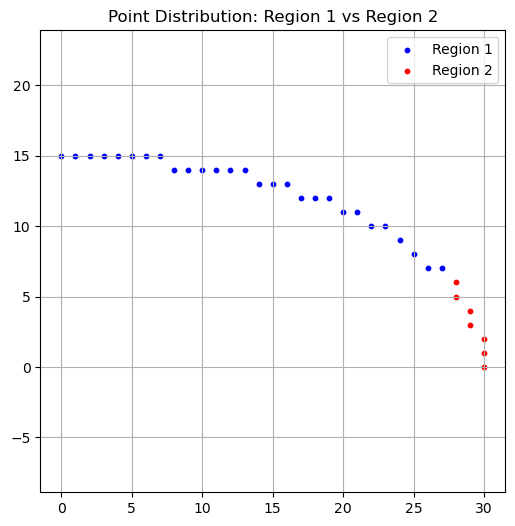

In [1]:
import math
import matplotlib.pyplot as plt

def midpoint_ellipse_regions(rx, ry, xc=0, yc=0):
    rx2 = rx * rx
    ry2 = ry * ry

    x = 0
    y = ry

    region1 = []
    region2 = []

    # -------- REGION 1 --------
    p1 = ry2 - rx2 * ry + 0.25 * rx2
    while 2 * ry2 * x <= 2 * rx2 * y:
        region1.append((x + xc, y + yc))
        x += 1
        if p1 < 0:
            p1 += 2 * ry2 * x + ry2
        else:
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2

    # -------- REGION 2 --------
    p2 = (ry2 * (x + 0.5)**2) + (rx2 * (y - 1)**2) - (rx2 * ry2)
    while y >= 0:
        region2.append((x + xc, y + yc))
        y -= 1
        if p2 > 0:
            p2 += rx2 - 2 * rx2 * y
        else:
            x += 1
            p2 += 2 * ry2 * x + rx2 - 2 * rx2 * y

    return region1, region2


def average_spacing(points):
    distances = []
    for i in range(len(points) - 1):
        x1, y1 = points[i]
        x2, y2 = points[i + 1]
        d = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distances.append(d)
    return sum(distances) / len(distances)


# ----comparison ----
r1, r2 = midpoint_ellipse_regions(30, 15)

avg_r1 = average_spacing(r1)
avg_r2 = average_spacing(r2)

print("Average point spacing:")
print(f"Region 1: {avg_r1:.3f}")
print(f"Region 2: {avg_r2:.3f}")

# ---- Visualization ----
x1, y1 = zip(*r1)
x2, y2 = zip(*r2)

plt.figure(figsize=(6, 6))
plt.scatter(x1, y1, color='blue', s=10, label='Region 1')
plt.scatter(x2, y2, color='red', s=10, label='Region 2')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Point Distribution: Region 1 vs Region 2")
plt.show()
